# Fundamentals Of Statistics In Python

Random Variables

In [8]:
import numpy as np

x = np.array([1,3,5,6])
x_mean = np.mean(x)
print(x_mean)

x = np.array([1,3,5,6])
x_var = np.var(x)
print(x_var)

x = np.array([1,3,5,6])
x_std = np.std(x)
print(x_std)

3.75
3.6875


In [11]:
x = np.array([1,3,5,6])
y = np.array([-2,-4,-5,-6])

cov_xy = np.cov(x,y)
print(cov_xy)
             # this will return the covariance matrix of x,y containing x_variance, 
              # y_variance on diagonal elements and covariance of x,y
corr_xy = np.corrcoef(x,y)
print(corr_xy)
              # shows COV(X,X) = 1 and COV(Y,Y) = 1 on the diagnoal

[[ 4.91666667 -3.75      ]
 [-3.75        2.91666667]]
[[ 1.         -0.99026741]
 [-0.99026741  1.        ]]


Probability Distribution Functions

1. Binomial Distribution

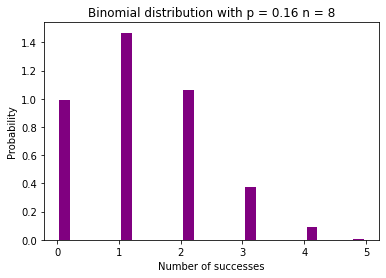

In [16]:
# Random Generation of 1000 independent Binomial samples
import numpy as np
n = 8
p = 0.16
N = 1000
X = np.random.binomial(n,p,N)
# Histogram of Binomial distribution
import matplotlib.pyplot as plt
BinomialPlot= plt.hist(X, 20, density = True, rwidth = 0.7, color = 'purple')
plt.title("Binomial distribution with p = 0.16 n = 8")
plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.show()

2. Poisson Distribution

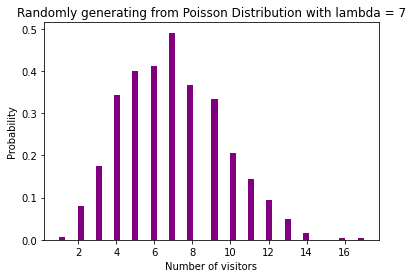

In [22]:
# Random Generation of 1000 independent Poisson sample
lambda1 = 7 # should give a different name rather than directly lambda
N = 1000
X=np.random.poisson(lambda1,N)

# Histogram of Poisson distribution
PoissonPlot = plt.hist(X, 50, density = True, color = 'purple')
plt.title("Randomly generating from Poisson Distribution with lambda = 7")
plt.xlabel("Number of visitors")
plt.ylabel("Probability")
plt.show()

3. Normal Distribution

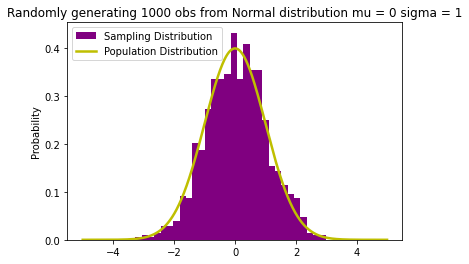

In [27]:
# Random Generation of 1000 independent Normal samples
mu = 0
sigma = 1
N = 1000
X = np.random.normal(mu,sigma,N)

# Population distribution
from scipy.stats import norm
x_values = np.arange(-5,5,0.01)
y_values = norm.pdf(x_values)

#Sample histogram with Population distribution
NormalPlot= plt.hist(X, 30, density = True,color = 'purple',label = 'Sampling Distribution')
plt.plot(x_values,y_values, color = 'y',linewidth = 2.5,label = 'Population Distribution')
plt.title("Randomly generating 1000 obs from Normal distribution mu = 0 sigma = 1")
plt.ylabel("Probability")
plt.legend()
plt.show()

4. Linear Regression

coefficient of determination: 0.7158756137479542


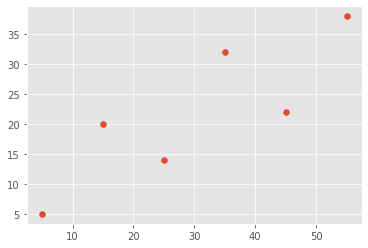

In [40]:
import sklearn
from sklearn.linear_model import LinearRegression
from matplotlib import style
import matplotlib.pyplot as plt

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

model = LinearRegression()
model.fit(x, y)
acc = model.score(x,y)
print('coefficient of determination:',acc)
# In terms of regression analysis, the coefficient of determination is 
# an overall measure of the accuracy of the regression model.
style.use("ggplot")
plt.scatter(x,y)
plt.show()

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv("/Users/yikaima/Desktop/Python_Jupyter/iris.data",names=names)

In [47]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:ylabel='Class'>

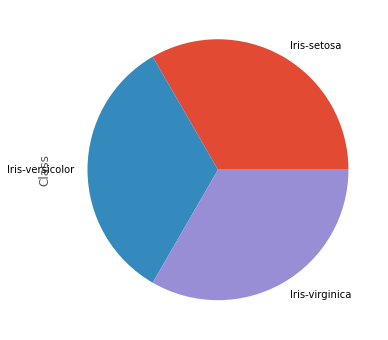

In [51]:
dataset['Class'].value_counts().plot(kind='pie', figsize=(6,6))

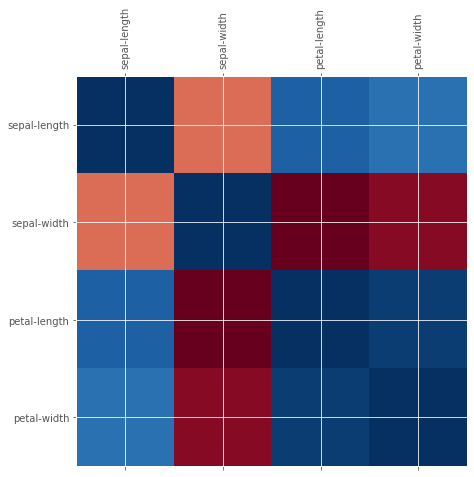

In [66]:
corr = dataset.corr()
fig = plt.figure(figsize=(7,7))
plt.matshow(corr,cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

# T-test

In [102]:
import numpy as np  
from scipy import stats  

# first use the function to calculate the t-statistics ans compare when the p-value
# following this, use inbuilt ttest function to check the conclusion

n1 = 25  
n2 = 30
x = np.random.randn(n1) + 2      # Gaussian distributed data with mean = 2 and var = 1  
y = np.random.randn(n2) + 1      # Gaussian distributed data with mean = 1 and var = 1 
var_x = x.var(ddof = 1)          # when calculate the variance, we should tell the degree of freedom
var_y = y.var(ddof = 1)  
SD = np.sqrt( ( (n1-1)* var_x + (n2-1)* var_y )/(n1+n2-2))
print("Standard Deviation =", SD)  
 # Calculating the T-Statistics  
t_statsitic = (x.mean() - y.mean()) / (SD * np.sqrt(1/n1 + 1/n2))  # equal variance
 # degree of freedom
dof=n1+n2-2
 # p-value after comparison with the T-Statistics  
pval = 1 - stats.t.cdf( t_statsitic, df = dof)  
print("t = " + str(t_statsitic))    # notice, str()
print("p = " + str(2 * pval))  

# Cross Checking using the internal function from SciPy Package   
t_statistic2, pval2 = stats.ttest_ind(x, y)   # we can directly use this
print("t_cross = " + str(t_statistic2))  
print("p_cross = " + str(pval2)) 

[ 2.88830127  1.67316687 -1.55945966  0.72928072  1.88222156  2.46682697
  2.4907351   2.89498488  0.97769905  1.36647385  1.62841627  2.77410466
  0.37702949  1.03798599  2.89327793  1.71876787  2.3597413   0.39783557
  2.58474273  3.48326782  2.91198579  2.62690818  2.3776912   2.51609331
  2.60821958]
Standard Deviation = 1.0586508865886095
t = 3.6977950952140333
p = 0.000517240762109461
t_cross = 3.6977950952140333
p_cross = 0.0005172407621094923
